In [1]:
%matplotlib inline

In [3]:
import pandas as pd 

import duckdb
from tqdm.auto import tqdm 
import pandas as pd

#connection_source = duckdb.connect(database="../dbt/database_name.duckdb", read_only = True)

In [4]:
histo_path = "/Users/raphaelcourivaud/Downloads/5000-signalement.csv"

df_histo = pd.read_csv(histo_path)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def explore_dataframe(df, exclude_cols = ["id", "uuid", "ban_id_occupant"]):
    """
    Explore a Pandas DataFrame by displaying histograms for numerical variables
    and donut charts for categorical variables.
    """
    for column in [c for c in df.columns if c not in exclude_cols]:
        print(f"Processing {column}")
        plt.figure(figsize=(8, 5))
        
        if pd.api.types.is_numeric_dtype(df[column]):
            sns.histplot(df[column], kde=True, bins=30, color='royalblue')
            plt.title(f"Histogramme de {column}")
            plt.xlabel(column)
            plt.ylabel("Fréquence")
            
        elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':
            value_counts = df[column].value_counts()
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'}, pctdistance=0.85)
            centre_circle = plt.Circle((0,0),0.70,fc='white')
            fig = plt.gcf()
            fig.gca().add_artist(centre_circle)
            plt.title(f"Répartition de {column}")
            
        plt.show()

In [16]:
df_histo.columns

Index(['id', 'uuid', 'ban_id_occupant', 'adresse_occupant', 'cp_occupant',
       'ville_occupant', 'insee_occupant', 'etage_occupant',
       'escalier_occupant', 'num_appart_occupant', 'adresse_autre_occupant',
       'nb_niveaux_logement', 'nature_logement', 'superficie',
       'annee_construction', 'nb_pieces_logement', 'type_proprio',
       'prenom_proprio', 'code_postal_proprio', 'ville_proprio', 'nom_proprio',
       'adresse_proprio'],
      dtype='object')

In [ ]:
# Colonnes à utiliser: 
# ban_id_occupant / nb_pieces_logement /
# superficie / prenom_proprio / code_postal_proprio / 
# ville_proprio / nom_proprio / adresse_proprio

In [30]:
df_histo[df_histo["escalier_occupant"].str.lower().str.contains("oui").fillna(False)]["escalier_occupant"].value_counts()

escalier_occupant
Oui    30
oui    26
OUI     3
Name: count, dtype: int64

In [25]:
df_histo[df_histo["etage_occupant"].str.lower().str.contains("rdc").fillna(False)]["etage_occupant"].value_counts()

etage_occupant
RDC      190
Rdc      102
rdc       79
Rdc       26
RDC       17
rdc        5
rdc d      2
rdch       2
RdC        1
RDCG       1
 RDC       1
RDC/1      1
Rdch       1
Rdc d      1
Rdc B      1
rdc g      1
Rdch       1
Name: count, dtype: int64

In [48]:
def try_parsing_float(x: str):
    try: 
        return float(x)
    except:
        return -1

In [52]:
df_histo[df_histo.num_appart_occupant.apply(try_parsing_float)==-1]["num_appart_occupant"].value_counts()

num_appart_occupant
droit    8
B        8
D        6
Rdc      6
Droit    5
        ..
35BIS    1
A101     1
BATC2    1
A32      1
ROUGE    1
Name: count, Length: 257, dtype: int64

In [41]:
df_histo.iloc[df_histo.nb_pieces_logement.idxmax()]

id                                                                69770
uuid                               7b1976f5-fb3c-4042-8aac-f2dbdf264a0a
ban_id_occupant                                        59009_7300_00076
adresse_occupant                                  76 Boulevard Van Gogh
cp_occupant                                                       59650
ville_occupant                                        Villeneuve-d'Ascq
insee_occupant                                                    59009
etage_occupant                                                        2
escalier_occupant                                                   NaN
num_appart_occupant                                                 NaN
adresse_autre_occupant                                              NaN
nb_niveaux_logement                                                 NaN
nature_logement                                             appartement
superficie                                                      

Processing etage_occupant


/var/folders/_v/10w6h3595jb25htv66pv5fq80000gn/T/ipykernel_15726/582674480.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


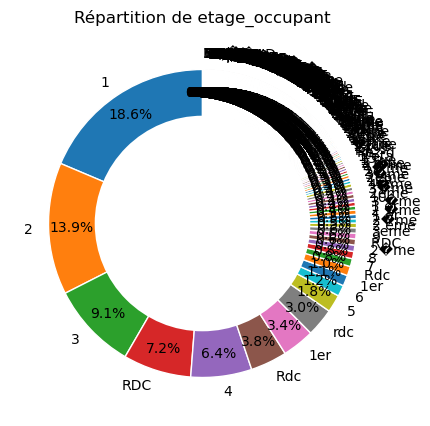

Processing escalier_occupant


/var/folders/_v/10w6h3595jb25htv66pv5fq80000gn/T/ipykernel_15726/582674480.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


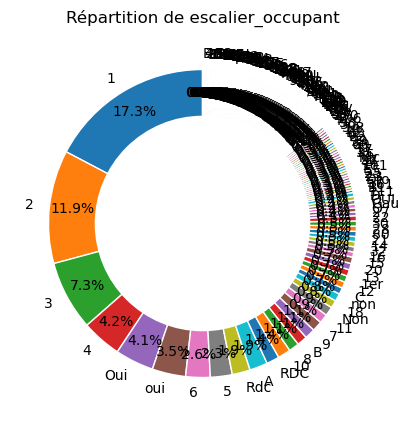

Processing num_appart_occupant


/var/folders/_v/10w6h3595jb25htv66pv5fq80000gn/T/ipykernel_15726/582674480.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


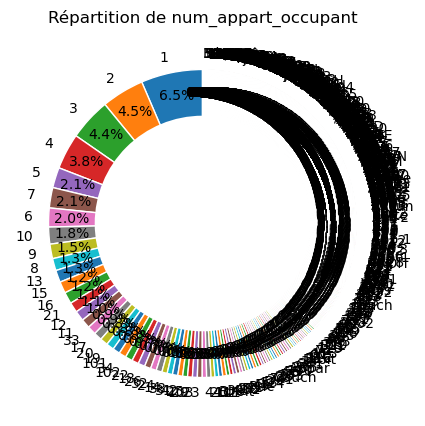

Processing nb_niveaux_logement


/Users/raphaelcourivaud/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


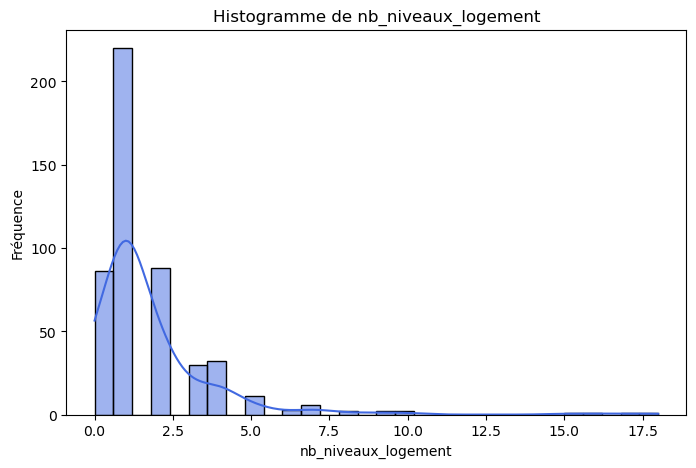

Processing nature_logement


/var/folders/_v/10w6h3595jb25htv66pv5fq80000gn/T/ipykernel_15726/582674480.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


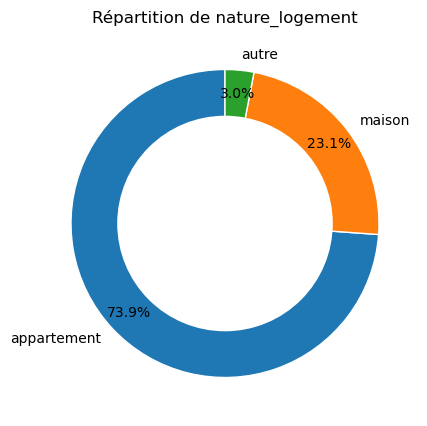

Processing superficie


/Users/raphaelcourivaud/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


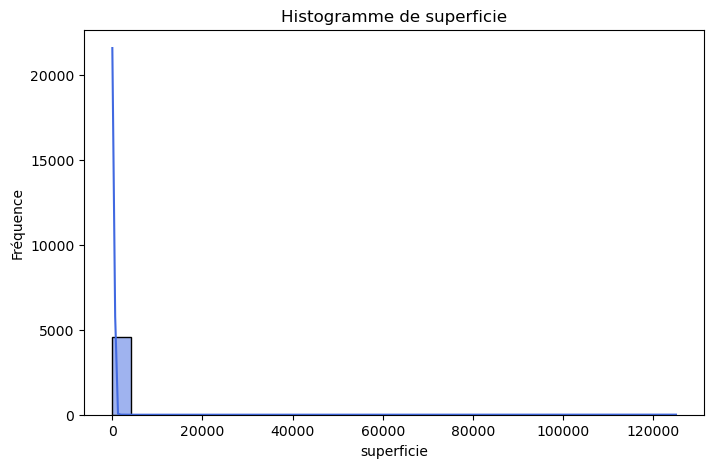

Processing annee_construction


/Users/raphaelcourivaud/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


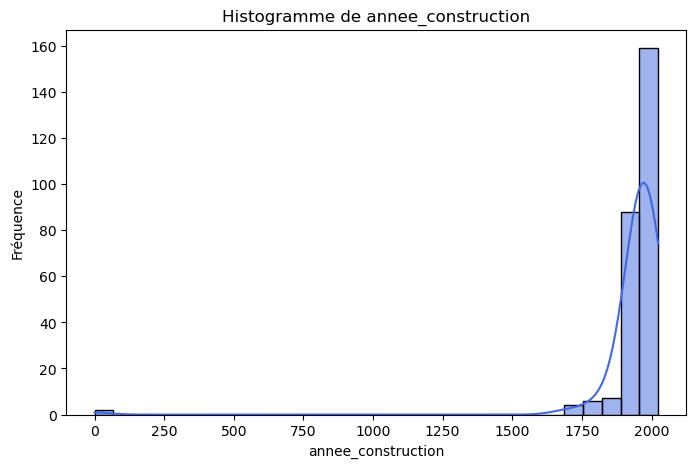

Processing nb_pieces_logement


/Users/raphaelcourivaud/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


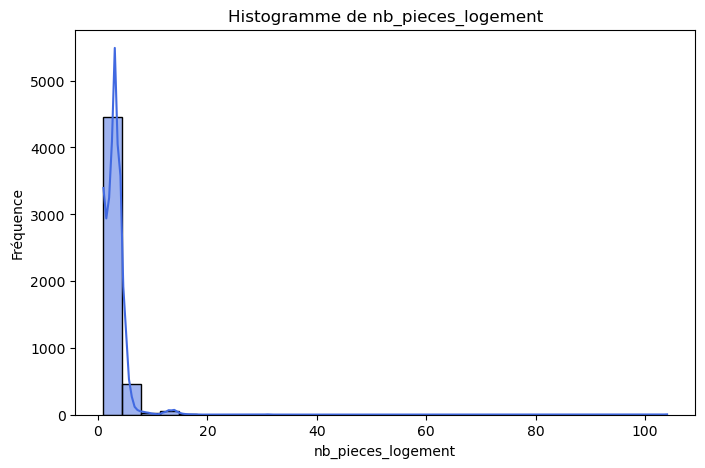

Processing type_proprio


/var/folders/_v/10w6h3595jb25htv66pv5fq80000gn/T/ipykernel_15726/582674480.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


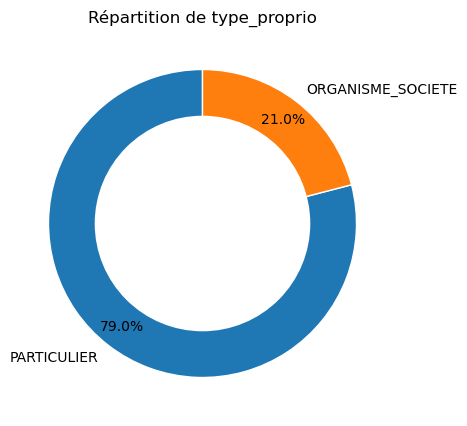

Processing prenom_proprio


/var/folders/_v/10w6h3595jb25htv66pv5fq80000gn/T/ipykernel_15726/582674480.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


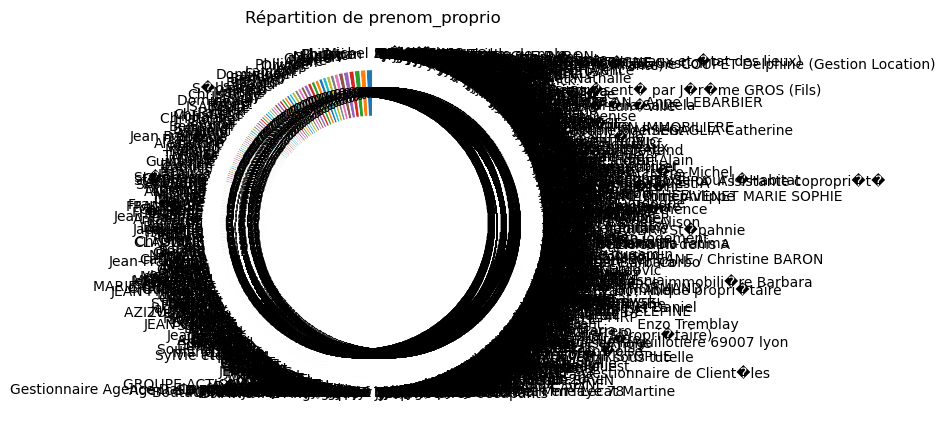

Processing code_postal_proprio


/Users/raphaelcourivaud/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


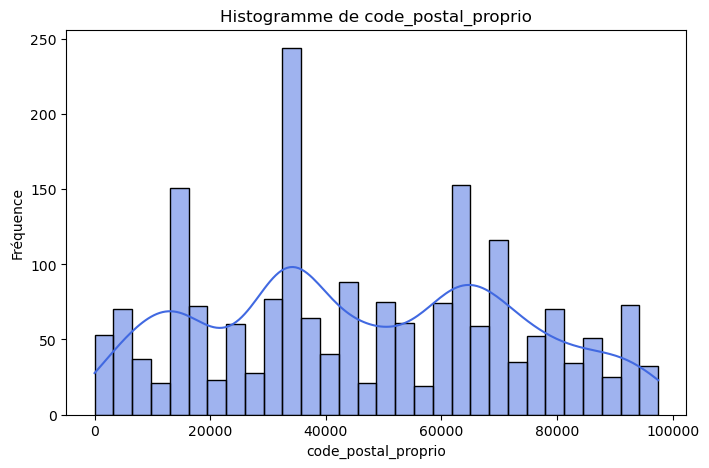

Processing ville_proprio


/var/folders/_v/10w6h3595jb25htv66pv5fq80000gn/T/ipykernel_15726/582674480.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':


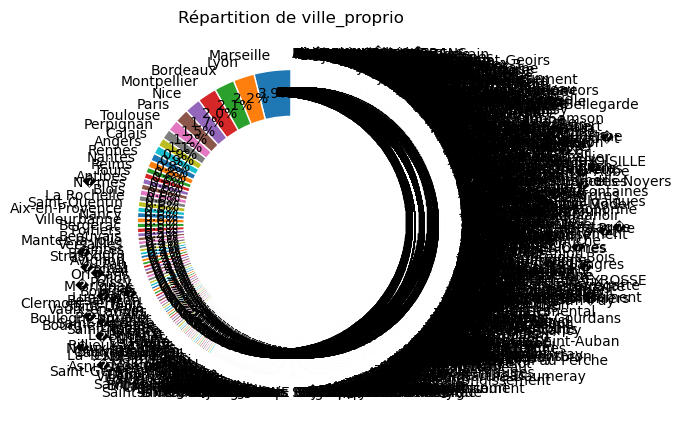

In [18]:
explore_dataframe(df_histo, exclude_cols=["id", "uuid", "adresse_occupant", "cp_occupant", "ville_occupant",
                                           "insee_occupant","nom_proprio", "adresse_proprio", "ban_id_occupant", "adresse_autre_occupant"])